In [1]:
from google.colab import drive

drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import os
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
from collections import Counter 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dfmerge = pd.read_csv("/content/gdrive/My Drive/finalmerge.csv",index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
dfmerge.describe()

,Unnamed: 0_x,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Unnamed: 0_y,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,time_x,Unnamed: 0.1,windspeedKmph_y,winddirDegree_y,weatherCode_y,precipMM_y,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,time_y
count,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06
mean,2.201694e+05,2.515150e+00,2.016494e+03,6.544028e+00,1.576547e+01,1.318193e+03,1.999537e-01,1.297760e+03,1.398036e+01,1.273796e+04,1.273937e+04,1.475983e+03,1.476221e+03,2.089705e-01,1.423142e+01,3.691335e+02,1.254870e+01,1.885540e+02,1.456484e+02,2.630467e-01,9.501128e+00,1.016012e+03,4.168825e+01,4.946636e+01,1.688418e+01,6.604433e+01,6.476720e+01,6.210289e+01,1.476221e+03,3.673489e+02,1.230411e+01,1.865897e+02,1.462245e+02,2.550000e-01,9.418141e+00,1.016167e+03,4.280911e+01,4.934882e+01,1.661847e+01,6.527912e+01,6.387153e+01,6.345448e+01,1.297760e+03
std,1.449516e+05,1.104474e+00,4.999603e-01,3.396029e+00,8.790736e+00,5.166970e+02,3.999654e-01,5.026491e+02,4.148781e+01,1.354192e+03,1.356409e+03,5.528555e+02,5.348307e+02,4.065734e-01,4.142203e+01,2.110346e+02,6.471354e+00,8.603604e+01,6.990671e+01,1.004745e+00,1.722554e+00,6.315331e+00,3.932331e+01,1.611147e+01,9.024073e+00,1.710963e+01,1.893322e+01,2.252080e+01,5.348307e+02,2.110373e+02,6.508047e+00,8.698118e+01,6.996480e+01,9.781583e-01,1.861534e+00,6.315904e+00,3.971353e+01,1.615241e+01,8.993893e+00,1.715484e+01,1.906687e+01,2.245897e+01,5.026491e+02
min,0.000000e+00,1.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.039700e+04,1.039700e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.810000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,-2.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.840000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,-2.500000e+01,3.000000e+00,0.000000e+00
25%,9.091400e+04,2.000000e+00,2.016000e+03,4.000000e+00,8.000000e+00,9.040000e+02,0.000000e+00,9.000000e+02,0.000000e+00,1.129800e+04,1.129800e+04,1.059000e+03,1.100000e+03,0.000000e+00,0.000000e+00,1.860000e+02,8.000000e+00,1.240000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.600000e+01,5.400000e+01,4.700000e+01,1.100000e+03,1.840000e+02,7.000000e+00,1.200000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.500000e+01,5.300000e+01,4.800000e+01,9.000000e+02
50%,2.067500e+05,3.000000e+00,2.016000e+03,7.000000e+00,1.600000e+01,1.314000e+03,0.000000e+00,1.300000e+03,0.000000e+00,1.289200e+04,1.289200e+04,1.523000e+03,1.500000e+03,0.000000e+00,0.000000e+00,3.710000e+02,1.200000e+01,1.970000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.300000e+01,5.200000e+01,1.500000e+01,6.700000e+01,6.700000e+01,6.600000e+01,1.500000e+03,3.690000e+02,1.100000e+01,1.950000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.500000e+01,5.100000e+01,1.500000e+01,6.600000e+01,6.600000e+01,6.700000e+01,1.300000e+03
75%,3.458240e+05,3.000000e+00,2.017000e+03,9.000000e+00,2.300000e+01,1.736000e+03,0.000000e+00,1.700000e+

Selecting Feature columns as x

In [6]:
X=dfmerge.drop([
               "ArrDelayMinutes",
                "ArrTime",
                "ArrDel15",
                 "Unnamed: 0_x",
                 "Unnamed: 0_y",
                 "Unnamed: 0.1",
                "Origin",
                "Dest",
                "airport_x",
                "airport_y",
                "FlightDate",
                "date_y",
                "date_x",
                "time_x",
                "time_y",
                "windspeedKmph_y",
                "winddirDegree_y",
                "weatherCode_y",
                "precipMM_y",
                "visibility_y",
                "pressure_y",
                "cloudcover_y",
                "DewPointF_y",
                "WindGustKmph_y",
                "tempF_y",
               "WindChillF_y",
               "humidity_y",],axis=1)
X


,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x
0,1,2016,1,1,741.0,0.0,700,0.0,14747,12478,1600,22,255,113,0.0,10,1015,0,32,26,41,32,74
1,1,2016,1,1,705.0,0.0,700,0.0,14747,12892,900,12,31,113,0.0,10,1020,2,30,15,51,47,46
2,1,2016,1,1,658.0,0.0,700,3.0,14747,12892,900,12,31,113,0.0,10,1020,2,30,15,51,47,46
3,1,2016,1,1,723.0,0.0,700,6.0,14747,12478,1500,21,254,113,0.0,10,1016,0,33,24,42,33,74
4,1,2016,1,1,726.0,0.0,700,0.0,14747,12892,1000,10,39,113,0.0,10,1020,9,29,13,53,49,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815400,3,2017,9,18,2240.0,0.0,2200,0.0,12478,12892,200,5,220,113,0.0,10,1012,1,70,6,74,74,87
1815401,3,2017,9,21,2358.0,1.0,2200,73.0,12478,12892,200,11,179,143,0.0,10,1010,56,63,12,65,65,91
1815402,3,2017,9,22,2240.0,0.0,2200,0.0,12478,12892,200,10,135,113,0.0,10,1010,3,59,12,67,67,75
1815403,3,2017,9,23,2146.0,0.0,2100,3.0,12478,12892,100,6,202,113,0.0,10,1009,4,61,8,68,68,80


In [0]:
Y=dfmerge["ArrDel15"]
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = None) 

In [13]:
Y_train.value_counts()

0.0    1005124
1.0     265659
Name: ArrDel15, dtype: int64

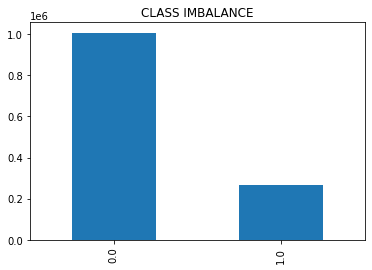

In [14]:
Y_train.value_counts().plot(kind='bar', title='CLASS IMBALANCE');


In [15]:
Y_test

1558696    0.0
1501578    1.0
369946     0.0
1484669    0.0
461826     0.0
          ... 
417875     0.0
1098467    0.0
982429     0.0
113599     0.0
1062769    0.0
Name: ArrDel15, Length: 544622, dtype: float64

# **resampling**

In [0]:
X = pd.concat([X_train, Y_train], axis=1)

In [0]:
not_delayed = X[X.ArrDel15==0]
delayed = X[X.ArrDel15==1]

In [0]:
from sklearn.utils import resample
delayed_upsampled = resample(delayed,replace=True, n_samples=len(not_delayed),random_state=27)

In [0]:
upsampled = pd.concat([not_delayed, delayed_upsampled])

In [20]:
upsampled.ArrDel15.value_counts()

1.0    1005124
0.0    1005124
Name: ArrDel15, dtype: int64

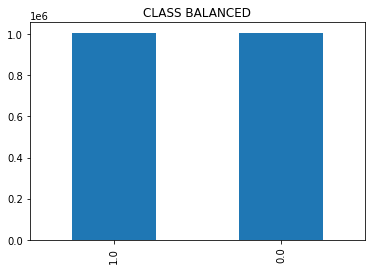

In [21]:
upsampled.ArrDel15.value_counts().plot(kind='bar', title='CLASS BALANCED');


In [22]:
upsampled

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,ArrDel15
1552681,2,2017,6,17,1234.0,0.0,1200,0.0,12892,14771,1400,31,292,113,0.0,10,1013,0,53,33,71,72,50,0.0
676166,2,2016,6,2,1010.0,0.0,1000,10.0,11618,14771,1300,11,279,116,0.0,10,1016,34,53,12,68,64,68,0.0
673427,2,2016,6,11,1007.0,0.0,1000,0.0,11057,10397,1100,4,186,119,0.0,10,1020,38,64,5,83,84,41,0.0
1006772,4,2017,10,17,1423.0,0.0,1400,0.0,12266,11292,1600,11,149,113,0.0,10,1014,0,9,19,70,70,10,0.0
260568,4,2016,12,30,1127.0,0.0,1100,0.0,10397,12892,1300,7,64,302,4.8,7,1018,89,59,9,64,62,89,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758001,3,2016,7,29,2005.0,1.0,1700,170.0,11057,13930,1800,23,19,122,0.1,10,1013,100,68,33,76,76,77,1.0
1562588,2,2017,6,2,139.0,1.0,2200,194.0,11298,12889,2300,11,242,113,0.0,10,1007,0,28,13,85,85,13,1.0
551702,2,2016,5,10,1653.0,1.0,1500,78.0,12892,14771,1600,15,276,113,0.0,10,1015,9,53,17,65,62,72,1.0
1239297,1,2017,2,28,1637.0,0.0,1600,2.0,11618,14107,2000,6,310,113,0.0,10,1018,33,47,9,60,60,52,1.0


In [0]:
y_train = upsampled.ArrDel15
x_train = upsampled.drop(['ArrDel15'], axis=1)

In [0]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
y_train.value_counts()

1.0    1005124
0.0    1005124
Name: ArrDel15, dtype: int64

**Decision Tree Classifier**

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred2 = clf.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92    430915
         1.0       0.70      0.70      0.70    113707

    accuracy                           0.87    544622
   macro avg       0.81      0.81      0.81    544622
weighted avg       0.87      0.87      0.87    544622



**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)


In [29]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94    430915
         1.0       0.81      0.72      0.76    113707

    accuracy                           0.91    544622
   macro avg       0.87      0.84      0.85    544622
weighted avg       0.90      0.91      0.90    544622



**EXTRA-TREES Classifier**

In [30]:

from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_jobs=-1,random_state =None)
etc.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [0]:
Y_predetc=etc.predict(X_test)

In [32]:
target_names=["Class 0","Class 1"]
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_predetc,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.93      0.95      0.94    430915
     Class 1       0.80      0.74      0.77    113707

    accuracy                           0.91    544622
   macro avg       0.87      0.84      0.86    544622
weighted avg       0.91      0.91      0.91    544622



In [36]:
Y_predetc
xtdf=pd.DataFrame(Y_predetc)
xtdf[0]
X_test["ArrDelayMinutes"]=dfmerge["ArrDelayMinutes"]
X_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,ArrDelayMinutes
1558696,2,2017,6,15,605.0,0.0,600,0.0,14747,11298,1200,21,197,200,0.1,9,1013,51,73,24,88,90,59,0.0
1501578,2,2017,5,14,2108.0,0.0,2100,13.0,12892,12889,2200,20,225,113,0.0,10,1002,0,16,22,72,73,12,17.0
369946,1,2016,3,18,926.0,0.0,900,6.0,13303,12478,1200,28,259,113,0.0,10,1009,3,32,37,51,44,51,1.0
1484669,2,2017,5,10,556.0,0.0,600,0.0,10397,13204,700,0,168,113,0.0,10,1017,0,62,7,68,70,75,0.0
461826,2,2016,4,27,1330.0,0.0,1300,0.0,14747,14771,1500,25,293,176,0.1,9,1014,13,53,28,61,58,79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417875,1,2016,3,21,1346.0,0.0,1400,0.0,11298,12892,1500,14,246,122,0.0,10,1019,99,59,16,65,64,85,9.0
1098467,4,2017,11,9,1415.0,0.0,1400,0.0,10397,11298,1500,5,47,116,0.0,10,1026,73,41,8,53,53,63,0.0
982429,1,2017,1,5,831.0,0.0,800,1.0,14771,11618,1600,14,241,122,0.0,10,1015,100,21,17,32,24,66,0.0
113599,4,2016,10,12,716.0,0.0,700,0.0,14771,12266,1300,12,145,176,2.0,7,1017,99,73,16,83,81,77,0.0


In [0]:
import collections

classified_df = pd.DataFrame(X_test)

classified_df['Arrdel15']=Y_predetc

In [0]:
classified_df
classified_df.to_csv("mod2result15.csv")

In [0]:
#X_test=X_test.drop(["ArrDelayMinutes","Arrdel15"],axis=1)


**LOGISTIC REGRESSION**

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_predlog=logreg.predict(X_test)

target_names=["Class 0","Class 1"]
print(classification_report(Y_test,y_predlog,target_names=target_names))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

     Class 0       0.94      0.93      0.93    430915
     Class 1       0.74      0.78      0.76    113707

    accuracy                           0.90    544622
   macro avg       0.84      0.85      0.85    544622
weighted avg       0.90      0.90      0.90    544622



**XGBOOST**

In [34]:
import xgboost 
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
X_test_np = X_test.values
y_predxgb=model.predict(X_test)
from sklearn.metrics import classification_report

target_names=["Class 0","Class 1"]
print(classification_report(Y_test,y_predxgb,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.94      0.92      0.93    430915
     Class 1       0.73      0.79      0.76    113707

    accuracy                           0.90    544622
   macro avg       0.84      0.86      0.85    544622
weighted avg       0.90      0.90      0.90    544622

